In [ ]:
# create own network 
# https://www.kaggle.com/skooch/ddsm-mammography/notebooks
# lr scheduler : https://www.kaggle.com/skooch/fcn-for-detecting-abnormalities-in-mammograms
#   https://www.kaggle.com/allunia/breast-cancer

In [ ]:
#!cp ./chkp.pth ./drive/My\ Drive/

In [ ]:
!cp ./drive/My\ Drive/chkp.pth ./ 

In [ ]:
!cp ./drive/My\ Drive/all-mias.tar.gz ./

In [ ]:
!rm -r files;
!rmdir files;
!rm -r test;
!rm *.txt;

rm: cannot remove 'files': No such file or directory
rmdir: failed to remove 'files': No such file or directory
rm: cannot remove 'test': No such file or directory
rm: cannot remove '*.txt': No such file or directory


In [ ]:
!tar -xzvf all-mias.tar.gz

Info.txt
Licence.txt
README
mdb001.pgm
mdb002.pgm
mdb003.pgm
mdb004.pgm
mdb005.pgm
mdb006.pgm
mdb007.pgm
mdb008.pgm
mdb009.pgm
mdb010.pgm
mdb011.pgm
mdb012.pgm
mdb013.pgm
mdb014.pgm
mdb015.pgm
mdb016.pgm
mdb017.pgm
mdb018.pgm
mdb019.pgm
mdb020.pgm
mdb021.pgm
mdb022.pgm
mdb023.pgm
mdb024.pgm
mdb025.pgm
mdb026.pgm
mdb027.pgm
mdb028.pgm
mdb029.pgm
mdb030.pgm
mdb031.pgm
mdb032.pgm
mdb033.pgm
mdb034.pgm
mdb035.pgm
mdb036.pgm
mdb037.pgm
mdb038.pgm
mdb039.pgm
mdb040.pgm
mdb041.pgm
mdb042.pgm
mdb043.pgm
mdb044.pgm
mdb045.pgm
mdb046.pgm
mdb047.pgm
mdb048.pgm
mdb049.pgm
mdb050.pgm
mdb051.pgm
mdb052.pgm
mdb053.pgm
mdb054.pgm
mdb055.pgm
mdb056.pgm
mdb057.pgm
mdb058.pgm
mdb059.pgm
mdb060.pgm
mdb061.pgm
mdb062.pgm
mdb063.pgm
mdb064.pgm
mdb065.pgm
mdb066.pgm
mdb067.pgm
mdb068.pgm
mdb069.pgm
mdb070.pgm
mdb071.pgm
mdb072.pgm
mdb073.pgm
mdb074.pgm
mdb075.pgm
mdb076.pgm
mdb077.pgm
mdb078.pgm
mdb079.pgm
mdb080.pgm
mdb081.pgm
mdb082.pgm
mdb083.pgm
mdb084.pgm
mdb085.pgm
mdb086.pgm
mdb087.pgm
mdb088.pgm
mdb0

In [ ]:
!mkdir files
!mv *.pgm ./files/

In [ ]:
!mkdir ./files/B
!mkdir ./files/M

!mkdir test
!mkdir ./test/B
!mkdir ./test/M


In [ ]:
imgx={}
counter=0
with open("./Info.txt") as file:
  for line1 in file:
    counter+=1
    if (len(line1.split(" "))<3 or counter<104 or counter>433 or counter==322):
      continue
    if (len(line1.split())<=3):
      continue  
    if (len(line1.split(" "))!=7):
      continue
    print(line1)
    p1,p2,r=line1.split(" ")[4:]
    
    x1 = int(p1) - int(r)
    y1 = 1024 - int(p2) - int(r)
    x2 = int(p1) + int(r)
    y2 = 1024 - int(p2) + int(r)
    imgx[line1.split(" ")[0]]=(line1.split()[3],x1,y1,x2,y2)

mdb001 G CIRC B 535 425 197

mdb002 G CIRC B 522 280 69

mdb005 F CIRC B 477 133 30

mdb005 F CIRC B 500 168 26

mdb010 F CIRC B 525 425 33

mdb012 F CIRC B 471 458 40

mdb013 G MISC B 667 365 31

mdb015 G CIRC B 595 864 68

mdb017 G CIRC B 547 573 48

mdb019 G CIRC B 653 477 49

mdb021 G CIRC B 493 125 49

mdb023 G CIRC M 538 681 29

mdb025 F CIRC B 674 443 79

mdb028 F CIRC M 338 314 56

mdb030 G MISC B 322 676 43

mdb032 G MISC B 388 742 66

mdb058 D MISC M 318 359 27

mdb063 D MISC B 546 463 33

mdb069 F CIRC B 462 406 44

mdb072 G ASYM M 266 517 28

mdb075 F ASYM M 468 717 23

mdb080 F CIRC B 432 149 20

mdb081 G ASYM B 492 473 131

mdb083 G ASYM B 544 194 38

mdb090 G ASYM M 510 547 49

mdb091 F CIRC B 680 494 20

mdb092 F ASYM M 423 662 43

mdb095 F ASYM M 466 517 29

mdb097 F ASYM B 612 297 34

mdb099 D ASYM B 714 340 23

mdb102 D ASYM M 415 460 38

mdb104 D ASYM B 357 365 50

mdb105 D ASYM M 516 279 98

mdb107 D ASYM B 600 621 111

mdb110 D ASYM M 190 427 51

mdb111 D ASYM M 5

In [ ]:
import random
import time
import shutil,os
from PIL import Image


for key,item in imgx.items():
  shutil.move("./files/"+key+".pgm","./files/"+item[0]+"/"+key+".pgm")


In [ ]:
import cv2
dirs=["B","M"]

for dir in dirs:
  imgs=os.listdir("./files/"+dir)
  for img in imgs:
    i=cv2.imread("./files/"+dir+"/"+img)
    _,x1,y1,x2,y2=imgx[img.split(".")[0]]
   # it = cv2.rectangle(i, (x1, y1), (x2, y2), (255,255,255), 2)
    it=i[y1:y2,x1:x2]
   # it=i[imgx[img.split(".")[0]][1]:imgx[img.split(".")[0]][3],imgx[img.split(".")[0]][2]:imgx[img.split(".")[0]][4]]
    cv2.imwrite("./files/"+dir+"/"+img.split(".")[0]+".png",it)
      

In [ ]:
!rm -r ./files/{B,M}/*.pgm 
!rm  ./files/*.pgm

In [ ]:
dirs=["B","M"]

for dir in dirs:
  imgs=os.listdir("./files/"+dir)
  for img in imgs:
    i=Image.open("./files/"+dir+"/"+img)
    
    for angle in range(0,360,10):
      it=i.rotate(angle)
      it.save("./files/"+dir+"/"+img.split(".")[0]+"-"+str(angle)+".png")
      

In [ ]:
dirs=os.listdir("./files/")
for dir in dirs:
  files=os.listdir("./files/"+dir)
  print(dir,len(files))

B 2294
M 1813


In [ ]:
dirs=os.listdir("./files")
for dir in dirs:
  files=os.listdir("./files/"+dir)
  tmp=[]
  unique=set()
  for count in range(len(files)-1500):
    uni_int=random.randint(0,len(files)-1)
    while ( uni_int in unique ):
      random.seed(time.time())
      uni_int=random.randint(0,len(files)-1)
    
    unique.add(uni_int)
    tmp.append(files[uni_int])
  
  for file in tmp:
    shutil.move("./files/"+dir+"/"+file,"./test/"+dir+"/"+file)


In [ ]:
dirs=os.listdir("./files/")
for dir in dirs:
  files=os.listdir("./files/"+dir)
  print(dir,len(files))

B 1500
M 1500


In [ ]:
import torch
import numpy as np
import cv2
import torchvision
from matplotlib import  pyplot
import torchvision.transforms as transforms

In [ ]:
transformer=transforms.Compose([
        transforms.Resize((256,256)),
    #    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0),
    #    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2),
    #                        shear=None, resample=False, fillcolor=(255, 255, 255)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      #  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

  
dataset_train=torchvision.datasets.ImageFolder("./files",transform=transformer)

dataloader_train=torch.utils.data.DataLoader(dataset_train, batch_size=32,shuffle=True, num_workers=4)



dataset_test=torchvision.datasets.ImageFolder("./test",transform=transformer)

dataloader_test=torch.utils.data.DataLoader(dataset_test,shuffle=True, batch_size=32, num_workers=4)




FileNotFoundError: ignored

In [ ]:
class Identity(torch.nn.Module):
  def __init__(self):
    super(Identity,self).__init__()
  def forward(self,inp):
    return inp

class XRAYmodel(torch.nn.Module):
  def __init__(self):
    super(XRAYmodel,self).__init__()
    self.mainnet=torchvision.models.resnet101(pretrained=True)

    for layer in self.mainnet.parameters():
      layer.requires_grad=False
    
    self.mainnet.fc=torch.nn.Sequential(torch.nn.Conv2d(2048,3,1,1,0))
    self.mainnet.fc.requires_grad=True
    print(self.mainnet.fc.requires_grad)
  def forward(self,input):
    return self.mainnet(input)


def conv_block(in_ch,out_ch):
  network=[torch.nn.Conv2d(in_ch,out_ch,3,1,1)]
  network+=[torch.nn.BatchNorm2d(out_ch)]
  network+=[torch.nn.LeakyReLU(0.1)]
  return torch.nn.Sequential(*network)

class custom_model_RESBLOCK(torch.nn.Module):
  def __init__(self):
    super(custom_model_RESBLOCK,self).__init__()
    
    self.downsample=torch.nn.MaxPool2d(2)
    
    self.network1=conv_block(3,64)
    self.network2=conv_block(64,64)
    # 128
    self.network3=conv_block(64,128)
    self.network4=conv_block(128,128)
    # 64
    self.network5=conv_block(128,256)
    self.network6=conv_block(256,256)
    # 32
    self.network7=conv_block(256,512)
    self.network8=conv_block(512,512)
    # 16
    self.network9= conv_block(512,512)
    self.network10=conv_block(512,512)
    # 8
    self.network11=conv_block(512,1024)
    self.network12=conv_block(1024,1024)
    # 4
#    self.network13=conv_block(512,1024)
#    self.network14=conv_block(1024,1024)
    # 2
#    self.network15=conv_block(1024,2048)
#    self.network16=conv_block(2048,2048)
    # 1

    self.features=conv_block(1024,2)

  def forward(self,input):
    a=self.network1(input)
    b=a+self.network2(a)
    c=self.downsample(b)
    
    a=self.network3(c)
    b=a+self.network4(a)
    c=self.downsample(b)
    
    a=self.network5(c)
    b=a+self.network6(a)
    c=self.downsample(b)
    
    a=self.network7(c)
    b=a+self.network8(a)
    c=self.downsample(b)
    
    a=self.network9(c)
    b=a+self.network10(a)
    c=self.downsample(b)
    
    a=self.network11(c)
    b=a+self.network12(a)
    c=self.downsample(b)
    ###
#    a=self.network13(c)
#    b=a+self.network14(a)
#    c=self.downsample(b)
    
#    a=self.network15(c)
#    b=a+self.network16(a)
#    c=self.downsample(b)
    
    return self.features(c)


class FCN(torch.nn.Module):
  def __init__(self):
    super(FCN,self).__init__()
    self.feature_extractor=custom_model_RESBLOCK()
    self.fc=torch.nn.Sequential(torch.nn.ReLU(),torch.nn.BatchNorm2d(2),torch.nn.Conv2d(2,2,1,1,0))
  def forward(self,input):
    features=self.feature_extractor(input)
    return self.fc(features)


    

In [ ]:
model=custom_model_RESBLOCK()
model=model.cuda()

In [ ]:
#model(torch.randn((1,3,256,256)).cuda()).shape

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=2e-5)
criterion=torch.nn.CrossEntropyLoss()

#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,steps_per_epoch=len(dataloader_train),epochs=20)
# lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1) 

In [ ]:
#torch.ones((1,2,2,2))*torch.tensor([[[[2,2],[2,2]],[[3,3],[3,3]]]])

In [ ]:
#model.load_state_dict(torch.load("chkp.pth"))

In [ ]:
train_loss=[]
valid_loss=[]
epochs=[]



for epoch in range(100):
  acc_loss_train=0
  train_acc=0
  for img,label in dataloader_train:
    out=model(img.cuda())
    real=torch.LongTensor(label)
    real=real.view(out.shape[0],1,1)
    real=real*torch.ones((out.shape[0],4,4),dtype=torch.long)
    loss=criterion(out,real.cuda())
    acc_loss_train+=loss.item()
#    train_acc+=(real==torch.nn.Softmax()(out).max(dim=1)[1]).sum().item()/img.shape[0]
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#    try:
#      scheduler.step()
#    except:
#      pass

  epochs.append(epoch)
  train_loss.append(acc_loss_train/len(dataloader_train))
#  train_acc=train_acc/len(dataloader_train)

  model.eval()
  acc_loss_valid=0
  valid_acc=0
  with torch.no_grad():
    for img,label in dataloader_test:
      out=model(img.cuda())
      real=torch.LongTensor(label)
      real=real.view(out.shape[0],1,1)
      real=real*torch.ones((out.shape[0],4,4),dtype=torch.long)
      loss=criterion(out,real.cuda())
      acc_loss_valid+=loss.item()
#      valid_acc+=(real==torch.nn.Softmax()(out).max(dim=1)[1]).sum().item()/img.shape[0]

    valid_loss.append(acc_loss_valid/len(dataloader_test))
#    valid_acc=valid_acc/len(dataloader_test)

  model.train()
  
#  scheduler.step(acc_loss_valid)


  if (epoch%25==0):
    torch.save(model.state_dict(), "./chkp.pth")

  pyplot.plot(epochs,train_loss)
  pyplot.plot(epochs,valid_loss)
  pyplot.show()
  
#  print(f"Accuracy Train : {train_acc} ----- Accuracy Valid : {valid_acc}")
  print(f"Train_Loss : {train_loss[-1]} ----- Valid_Loss : {valid_loss[-1]}")



RuntimeError: ignored

In [ ]:
#!git clone https://github.com/tanjimin/grad-cam-pytorch-light.git
#!mv ./grad-cam-pytorch-light/* ./

In [ ]:
model.load_state_dict(torch.load("chkp.pth"))

<All keys matched successfully>

In [ ]:
model.eval()

custom_model_RESBLOCK(
  (downsample): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (network1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (network2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (network3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (network4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [ ]:
img=cv2.imread("a.jpg")
cv2.imwrite("1.jpg",img)

True

In [ ]:
from PIL import Image
img=Image.open("2.jpg")

In [ ]:

transformerx=transforms.Compose([
        transforms.Resize((1024,1024)),
    #    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0),
    #    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2),
    #                        shear=None, resample=False, fillcolor=(255, 255, 255)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      #  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [ ]:
tensor=transformerx(img)

In [ ]:
dataset_train.class_to_idx

In [ ]:
out=model(tensor.unsqueeze(dim=0).cuda())

In [ ]:
out.shape

torch.Size([1, 2, 16, 16])

In [ ]:
out=torch.nn.Softmax(dim=1)(out)

In [ ]:

preds = torch.softmax(out, dim=1)
print('Response map shape : ', preds.shape)

pred, class_idx = torch.max(preds, dim=1)


row_max, row_idx = torch.max(pred, dim=1)
col_max, col_idx = torch.max(row_max, dim=1)
predicted_class = class_idx[0, row_idx[0, col_idx], col_idx]
        
print('Predicted Class : ', predicted_class)

Response map shape :  torch.Size([1, 2, 16, 16])
Predicted Class :  tensor([0], device='cuda:0')


In [ ]:
pred.shape

torch.Size([1, 16, 16])

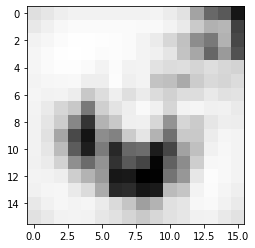

In [ ]:
pyplot.imshow(out[0].detach().cpu()[0],cmap='gray')

In [ ]:
predicted_class.item()

0

In [ ]:
ten=out[0].detach().cpu()[0]
ten=(ten-ten.min())/(ten.max()-ten.min())

ten.apply_(lambda x:1 if(x>0.80) else 0)



ten=255*ten.numpy()
ten=np.array(ten,dtype=np.uint8)
abc=cv2.applyColorMap(ten, cv2.COLORMAP_JET)
abc=cv2.resize(abc,(1024,1024))

imm=cv2.imread("2.jpg")
imm=cv2.cvtColor(imm,cv2.COLOR_BGR2GRAY)
imm=cv2.threshold(imm,127,255,cv2.THRESH_BINARY)


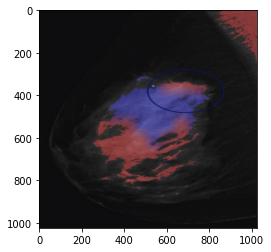

In [ ]:

immx=cv2.imread("2.jpg")
immx=cv2.resize(immx,(1024,1024))

imm=cv2.cvtColor(immx,cv2.COLOR_BGR2GRAY)
_,imm=cv2.threshold(imm,127,255,cv2.THRESH_BINARY)

i=cv2.bitwise_and(abc,abc,mask=imm)


dst = cv2.addWeighted(immx, 0.4, i, 0.6, 0.0)
pyplot.imshow(dst)


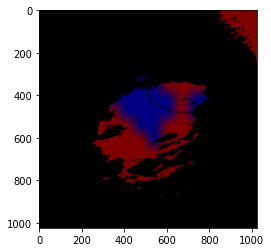

In [ ]:
pyplot.imshow(i)